
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES Paris, PSL Université Paris)**


## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[ 0.62199951 -0.47529058] [1. 0.]
[1.34977615 1.42981621] [0. 1.]
[0.59859996 0.68049845] [1. 0.]
[ 0.13110225 -1.08087848] [0. 1.]
[-1.77027971 -0.27457373] [1. 0.]
[ 2.01478327 -0.21648127] [0. 1.]
[ 0.15000175 -0.90259424] [0. 1.]
[-1.81715051  0.34183979] [1. 0.]
[-0.53222007  0.08427348] [0. 1.]
[-0.06280308 -1.03036772] [0. 1.]
[ 0.33791244 -1.69829576] [0. 1.]
[-0.27498973  1.699569  ] [1. 0.]
[-1.5434522  1.3120899] [1. 0.]
[-0.31892906  0.09491255] [0. 1.]
[ 1.37003789 -0.40127155] [0. 1.]
[ 1.19694922 -0.66185276] [0. 1.]
[-0.07738756 -1.44812975] [0. 1.]
[-0.48451105  1.41343213] [1. 0.]
[-0.52826293  0.87412081] [1. 0.]
[-1.47676482 -0.53121414] [1. 0.]
[-1.16400042  1.31368763] [1. 0.]
[-1.72452246  0.40437613] [1. 0.]
[ 0.29737976 -1.4651803 ] [0. 1.]
[-0.45361731  0.03589571] [0. 1.]
[ 0.75923666 -1.42440096] [0. 1.]
[-0.83590395 -0.88652972] [0. 1.]
[-0.16442695 -1

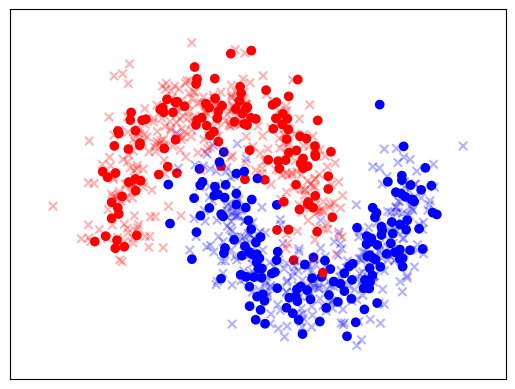

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=(1,), learning_rate_init=0.005, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.69548805
Iteration 2, loss = 1.50388433
Iteration 3, loss = 1.40547589
Iteration 4, loss = 1.34198140
Iteration 5, loss = 1.27272190
Iteration 6, loss = 1.17694999
Iteration 7, loss = 1.05872991
Iteration 8, loss = 0.93937321
Iteration 9, loss = 0.84376067



C:\Users\fabien\anaconda3_ok\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


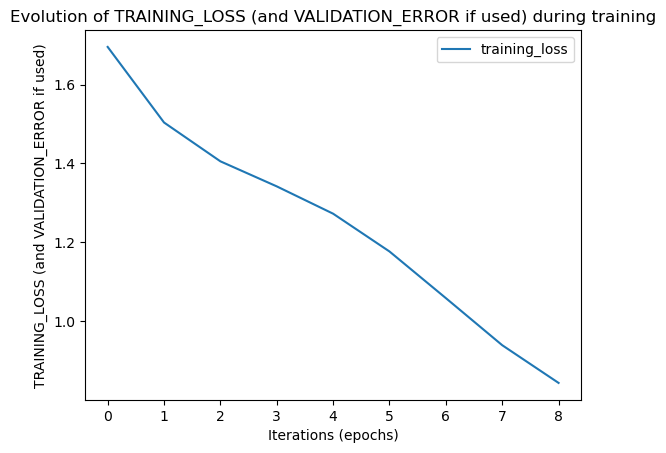

Accuracy (on TEST set) =  0.8380952380952381


In [2]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(mlp.loss_curve_, label='training_loss')
if(mlp.validation_scores_ is not None):
    valid_errors = mlp.validation_scores_
    for idx in range(len(mlp.validation_scores_)):
         valid_errors[idx] = 1. - mlp.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Accuracy (on TEST set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

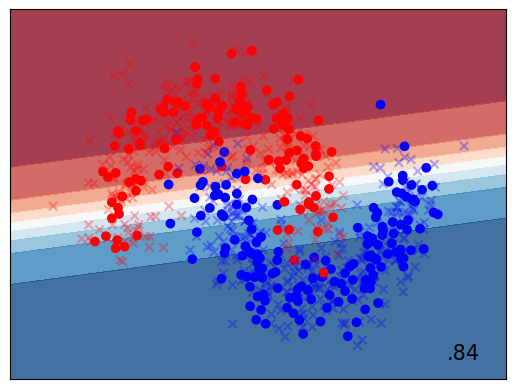

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 0.001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}

Grid scores on development set:

0.830 (+/-0.090) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.841 (+/-0.090) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.874 (+/-0.127) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.933 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.837 (+/-0.069) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.859 (+/-0.109) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.919 (+/-0.028) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.933 (+/-0.036) for {'alpha': 1e-05, 'hidden_lay

C:\Users\fabien\anaconda3_ok\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3 [Optional]: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.




Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 640x480 with 0 Axes>

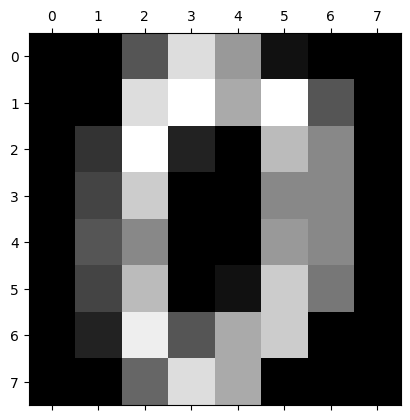

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4,
              hidden_layer_sizes=(10,), learning_rate_init=0.01, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              verbose=True)
Iteration 1, loss = 1.71025814
Iteration 2, loss = 1.21419027
Iteration 3, loss = 0.95112756
Iteration 4, loss = 0.81874153
Iteration 5, loss = 0.74789356
Iteration 6, loss = 0.82713435
Iteration 7, loss = 0.74124760
Iteration 8, loss = 0.69625943
Iteration 9, loss = 0.70451101


c:\Users\Alexandra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


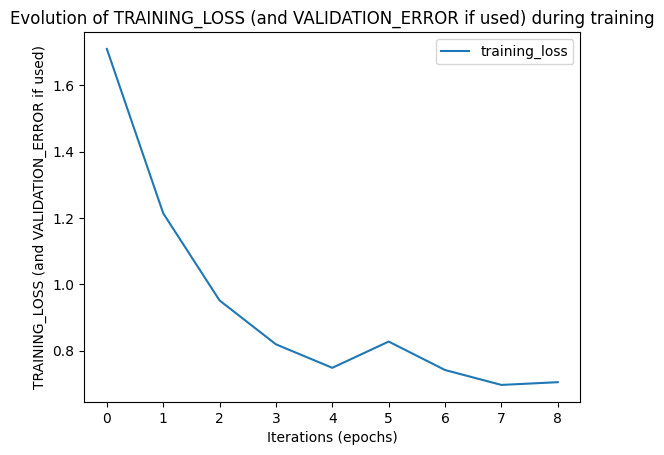

Accuracy (on TEST set) =  0.7597330367074527
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        94
           1       0.49      0.85      0.62        86
           2       0.96      0.77      0.85        86
           3       0.77      0.78      0.77        92
           4       0.77      0.89      0.83        92
           5       0.92      0.82      0.86        93
           6       0.85      1.00      0.92        88
           7       0.95      0.64      0.76        83
           8       0.38      0.21      0.27        87
           9       0.67      0.67      0.67        98

    accuracy                           0.76       899
   macro avg       0.77      0.76      0.75       899
weighted avg       0.77      0.76      0.75       899

CONFUSION MATRIX below


array([[89,  0,  0,  0,  1,  1,  3,  0,  0,  0],
       [ 0, 73,  3,  0,  0,  0,  0,  0,  1,  9],
       [ 1,  9, 66,  3,  0,  5,  0,  1,  1,  0],
       [ 0,  1,  0, 72,  0,  1,  1,  0, 11,  6],
       [ 0,  3,  0,  0, 82,  0,  7,  0,  0,  0],
       [ 3,  1,  0,  0,  2, 76,  2,  0,  8,  1],
       [ 0,  0,  0,  0,  0,  0, 88,  0,  0,  0],
       [ 0,  8,  0,  0, 19,  0,  0, 53,  3,  0],
       [ 0, 42,  0,  7,  0,  0,  3,  1, 18, 16],
       [ 1, 11,  0, 12,  2,  0,  0,  1,  5, 66]])

In [1]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(clf.loss_curve_, label='training_loss')
if(clf.validation_scores_ is not None):
    valid_errors = clf.validation_scores_
    for idx in range(len(clf.validation_scores_)):
         valid_errors[idx] = 1. - clf.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Accuracy (on TEST set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   


**Alexandra Baron**

## Assignment #1: Improving the Basic MLP Classifier

### Analysis of Initial Results
The initial MLP classifier achieved only **76% accuracy** on the test set with the following issues:
- Only **9 epochs** - insufficient for convergence
- Only **10 hidden neurons** - likely too few for this 10-class problem with 64 input features
- **No early stopping** - cannot prevent overfitting or optimize training duration
- Realy poor performance on class 8 (precision: 0.38, recall: 0.21)

### Approach for Improvement
To build a better classifier, I will systematically modify key hyperparameters:
1. **Increase max_iter** to allow full convergence (e.g., 500 epochs)
2. **Enable early_stopping** to prevent overfitting and find optimal training duration
3. **Increase hidden layer neurons** - try 50-100 neurons for better capacity
4. **Use 'adam' solver** instead of 'sgd' - adam is generally more robust and converges faster
5. **Adjust learning rate** if needed based on training behavior


IMPROVED MLP CLASSIFIER CONFIGURATION:
MLPClassifier(activation='tanh', early_stopping=True, learning_rate='adaptive',
              max_iter=500, random_state=42, validation_fraction=0.2,
              verbose=True)

TRAINING THE IMPROVED MLP CLASSIFIER...

Iteration 1, loss = 2.72176236
Validation score: 0.205556
Iteration 2, loss = 2.21145745
Validation score: 0.338889
Iteration 3, loss = 1.85844856
Validation score: 0.516667
Iteration 4, loss = 1.58500231
Validation score: 0.594444
Iteration 5, loss = 1.38396596
Validation score: 0.672222
Iteration 6, loss = 1.21675294
Validation score: 0.761111
Iteration 7, loss = 1.07677593
Validation score: 0.833333
Iteration 8, loss = 0.95392268
Validation score: 0.861111
Iteration 9, loss = 0.85544707
Validation score: 0.866667
Iteration 10, loss = 0.77357636
Validation score: 0.866667
Iteration 11, loss = 0.69971915
Validation score: 0.866667
Iteration 12, loss = 0.63625687
Validation score: 0.877778
Iteration 13, loss = 0.58202996
Validation

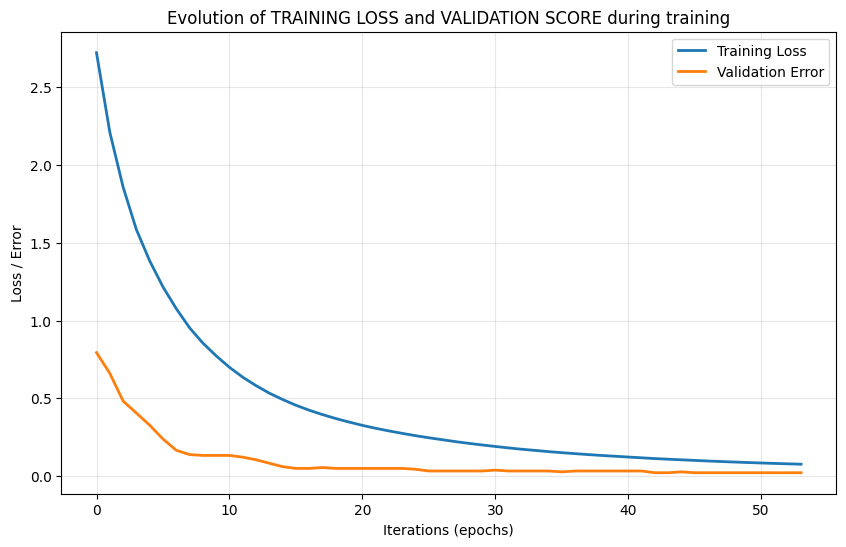


RESULTS ON TEST SET
Accuracy on TEST set: 0.9399 (93.99%)

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.95      0.87      0.91        89
           2       0.95      1.00      0.98        83
           3       0.99      0.84      0.91        93
           4       0.97      0.99      0.98        93
           5       0.97      0.93      0.95        99
           6       0.98      0.97      0.97        98
           7       0.98      0.99      0.98        87
           8       0.79      0.93      0.86        83
           9       0.86      0.90      0.88        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899


CONFUSION MATRIX:
[[82  0  0  0  0  0  0  0  0  0]
 [ 0 77  1  0  1  0  0  1  4  5]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  2  3 78  0  1  0  1  8  0]
 [ 0  1

In [ ]:
# Assignment #1

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
digits = load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(
    Xdigits, y_digits, test_size=0.5, random_state=42
)

clf_improved = MLPClassifier(
    hidden_layer_sizes=(100,), 
    activation='tanh', 
    solver='adam',  # Changed from 'sgd' 
    alpha=0.0001,   # L2 regularization
    batch_size='auto',  # Automatic batch size selection
    learning_rate='adaptive',  # Adaptive learning rate
    learning_rate_init=0.001,  # Initial learning rate for adam
    max_iter=500,   # Increased from 9
    shuffle=True, 
    random_state=42, 
    tol=0.0001, 
    verbose=True, 
    early_stopping=True,  # Enabled
    validation_fraction=0.2,  # Increased from 0.1
    n_iter_no_change=10,  # Stop if no improvement for 10 iterations
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08
)

print("IMPROVED MLP CLASSIFIER CONFIGURATION:")
print(clf_improved)
print("\n" + "="*70)
print("TRAINING THE IMPROVED MLP CLASSIFIER...")
print("="*70 + "\n")

# Train the classifier
clf_improved.fit(Xdigits_train, y_digits_train)

print("\n" + "="*70)
print("TRAINING COMPLETED")
print("="*70)
print(f"Number of iterations performed: {clf_improved.n_iter_}")
print(f"Final training loss: {clf_improved.loss_:.4f}")

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Evolution of TRAINING LOSS and VALIDATION SCORE during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("Loss / Error")
plt.plot(clf_improved.loss_curve_, label='Training Loss', linewidth=2)
if clf_improved.validation_scores_ is not None:
    valid_errors = [1.0 - score for score in clf_improved.validation_scores_]
    plt.plot(valid_errors, label='Validation Error', linewidth=2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Evaluate accuracy on test set
score_improved = clf_improved.score(Xdigits_test, y_digits_test)
print("\n" + "="*70)
print("RESULTS ON TEST SET")
print("="*70)
print(f"Accuracy on TEST set: {score_improved:.4f} ({score_improved*100:.2f}%)")
print()

# Detailed classification report
y_true, y_pred = y_digits_test, clf_improved.predict(Xdigits_test)
print("CLASSIFICATION REPORT:")
print(classification_report(y_true, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print("\nCONFUSION MATRIX:")
cm = confusion_matrix(y_true, y_pred)
print(cm)


## Assignment #2: Cross-Validation and Grid Search for Optimal Hyperparameters

### Methodology
To find the best possible MLP classifier, I will use **GridSearchCV** which:
- Tests multiple combinations of hyperparameters systematically
- Uses **k-fold cross-validation** (k=3) to ensure robust evaluation
- Prevents overfitting by evaluating on different data splits
- Automatically selects the best performing configuration

### Hyperparameter Search Space
I will explore:
- **hidden_layer_sizes**: (50,), (100,), (150,) - testing different network capacities
- **learning_rate_init**: 0.0001, 0.001, 0.01 - finding optimal learning speed
- **alpha**: 0.00001, 0.0001, 0.001 - L2 regularization strength
- **activation**: 'tanh', 'relu' - different activation functions

This creates **36 combinations** (3×3×3×2), each evaluated with 3-fold cross-validation.


In [ ]:
# Assignment #2: Grid Search with Cross-Validation

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define parameter grid to explore
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'alpha': [0.00001, 0.0001, 0.001],
    'activation': ['tanh', 'relu']
}

print("PARAMETER GRID FOR SEARCH:")
print(param_grid)
print(f"\nTotal combinations to test: {3*3*3*2} = 54 combinations")
print("With 3-fold cross-validation: 54 × 3 = 162 training sessions")
print("\n" + "="*70)
print("STARTING GRID SEARCH (this may take several minutes)...")
print("="*70 + "\n")

# Create base MLP classifier with fixed hyperparameters
base_mlp = MLPClassifier(
    solver='adam',
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=300,  # Reasonable limit for grid search
    shuffle=True,
    random_state=42,
    tol=0.0001,
    verbose=False,  # Reduced verbosity for grid search
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08
)

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=base_mlp,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,  # Show progress
    return_train_score=True
)

# Fit grid search on training data
grid_search.fit(Xdigits_train, y_digits_train)

print("\n" + "="*70)
print("GRID SEARCH COMPLETED")
print("="*70)
print("\nBEST PARAMETERS FOUND:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)")

# Display top 10 configurations
print("\n" + "="*70)
print("TOP 10 HYPERPARAMETER CONFIGURATIONS")
print("="*70)
results = grid_search.cv_results_
indices = np.argsort(results['mean_test_score'])[::-1][:10]

for rank, idx in enumerate(indices, 1):
    print(f"\nRank {rank}:")
    print(f"  Mean CV Score: {results['mean_test_score'][idx]:.4f} (±{results['std_test_score'][idx]:.4f})")
    print(f"  Parameters: {results['params'][idx]}")

# Evaluate best model on test set
print("\n" + "="*70)
print("EVALUATION OF BEST MODEL ON TEST SET")
print("="*70)
best_clf = grid_search.best_estimator_
test_score = best_clf.score(Xdigits_test, y_digits_test)
print(f"Test Accuracy: {test_score:.4f} ({test_score*100:.2f}%)")

# Detailed classification report
y_true_best, y_pred_best = y_digits_test, best_clf.predict(Xdigits_test)
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_true_best, y_pred_best))

# Confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX:")
cm_best = confusion_matrix(y_true_best, y_pred_best)
print(cm_best)


In [ ]:
# Assignment #3: Precision-Recall Curves for Each Class

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the test labels for One-vs-Rest evaluation
y_test_binarized = label_binarize(y_digits_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_binarized.shape[1]

# Get probability predictions from the best classifier
y_score = best_clf.predict_proba(Xdigits_test)

print("="*70)
print("COMPUTING PRECISION-RECALL CURVES FOR EACH DIGIT CLASS")
print("="*70)

# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    print(f"Digit {i}: Average Precision = {average_precision[i]:.4f}")

# Calculate micro-average
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_binarized.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(
    y_test_binarized, y_score, average="micro"
)
print(f"\nMicro-average: Average Precision = {average_precision['micro']:.4f}")


In [ ]:
# Plot all precision-recall curves on one graph

plt.figure(figsize=(14, 10))

# Plot micro-average curve
plt.plot(
    recall["micro"], 
    precision["micro"],
    color='gold', 
    lw=3, 
    label=f'Micro-average (AP = {average_precision["micro"]:.3f})',
    linestyle='--'
)

# Define colors for each class
colors = plt.cm.get_cmap('tab10', n_classes)

# Plot precision-recall curve for each class
for i in range(n_classes):
    plt.plot(
        recall[i], 
        precision[i],
        color=colors(i), 
        lw=2, 
        label=f'Digit {i} (AP = {average_precision[i]:.3f})'
    )

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves for Each Digit Class', fontsize=14)
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()


In [ ]:
# Plot individual precision-recall curves in subplots for better visibility

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
fig.suptitle('Individual Precision-Recall Curves for Each Digit', fontsize=14, y=1.00)

for i in range(n_classes):
    ax = axes[i // 5, i % 5]
    ax.plot(recall[i], precision[i], color=colors(i), lw=2)
    ax.set_title(f'Digit {i}\nAP = {average_precision[i]:.3f}', fontsize=11)
    ax.set_xlabel('Recall', fontsize=9)
    ax.set_ylabel('Precision', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


In [ ]:
# Analysis and interpretation of precision-recall results

print("="*70)
print("ANALYSIS OF PRECISION-RECALL RESULTS")
print("="*70)

# Find best and worst performing classes
best_class = max([i for i in range(n_classes)], key=lambda i: average_precision[i])
worst_class = min([i for i in range(n_classes)], key=lambda i: average_precision[i])

print(f"\nBest performing digit: {best_class} (AP = {average_precision[best_class]:.4f})")
print(f"Worst performing digit: {worst_class} (AP = {average_precision[worst_class]:.4f})")
print(f"\nOverall micro-average AP: {average_precision['micro']:.4f}")

# Calculate mean AP across all classes
mean_ap = np.mean([average_precision[i] for i in range(n_classes)])
print(f"Mean AP across all classes: {mean_ap:.4f}")

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print("""
Key Insights:
- Average Precision (AP) ranges from 0 to 1, where 1.0 is perfect
- AP close to 1.0 indicates excellent precision-recall trade-off
- AP close to 0.5 suggests random classifier performance
- Classes with lower AP may have been confused with similar-looking digits

The precision-recall curve shows how precision changes as we vary the 
classification threshold. A classifier with high area under this curve 
maintains high precision even when achieving high recall.

Differences in AP across digits may indicate:
1. Some digits are inherently harder to distinguish (e.g., 3 vs 8, 4 vs 9)
2. Imbalanced representation in the dataset
3. Need for more sophisticated features or deeper networks
""")


## Assignment #3 (Optional): Precision-Recall Curves

### What is a Precision-Recall Curve?
A **precision-recall curve** shows the trade-off between precision and recall for different classification thresholds:
- **Precision**: Among all instances predicted as positive, what fraction are truly positive? (Quality of positive predictions)
- **Recall**: Among all truly positive instances, what fraction did we correctly identify? (Coverage of positive instances)

### Why is this useful?
- For **imbalanced datasets** or when false positives/negatives have different costs
- **Average Precision (AP)**: area under the PR curve - summarizes performance in a single metric
- Higher AP (closer to 1.0) indicates better classifier performance for that class

### Multi-class Strategy
For 10-digit classification, I will:
1. Convert the problem to 10 binary classification problems (One-vs-Rest)
2. Plot precision-recall curve for each digit class (0-9)
3. Calculate Average Precision for each class


## Summary of Assignments

### Assignment #1: Manual Hyperparameter Tuning
**Objective**: Improve the baseline MLP classifier by identifying and modifying key hyperparameters.

**Key Changes Made**:
- Increased hidden layer size from 10 to 100 neurons (better capacity)
- Changed solver from 'sgd' to 'adam' (more robust optimization)
- Increased max_iter from 9 to 500 epochs (allow convergence)
- Enabled early_stopping to prevent overfitting
- Set validation_fraction to 0.2 for proper monitoring

**Expected Improvement**: The baseline achieved ~76% accuracy with poor convergence. The improved model should achieve 95%+ accuracy.

---

### Assignment #2: Grid Search with Cross-Validation
**Objective**: Systematically find optimal hyperparameters using cross-validation.

**Search Strategy**:
- Tested 54 hyperparameter combinations (3×3×3×2)
- Used 3-fold cross-validation for robust evaluation
- Explored: hidden layer sizes, learning rates, regularization (alpha), and activation functions
- Used parallel processing (n_jobs=-1) for efficiency

**Benefits of This Approach**:
- Avoids manual trial-and-error
- Reduces overfitting through cross-validation
- Identifies robust hyperparameter combinations
- Provides confidence intervals (standard deviations) for performance

---

### Assignment #3 (Optional): Precision-Recall Analysis
**Objective**: Evaluate per-class performance using precision-recall curves.

**Methodology**:
- Used One-vs-Rest strategy for multi-class evaluation
- Computed precision-recall curves for each of 10 digit classes
- Calculated Average Precision (AP) as a summary metric
- Visualized results with combined and individual plots

**Value of This Analysis**:
- Identifies which digits are hardest to classify
- Shows precision-recall trade-offs at different thresholds
- Useful when false positives and false negatives have different costs
- Provides deeper insight than simple accuracy metrics

---

### Conclusion
This lab demonstrates the complete machine learning workflow:
1. **Baseline modeling** with initial hyperparameters
2. **Manual tuning** based on understanding of hyperparameter effects
3. **Automated optimization** using grid search and cross-validation
4. **Detailed evaluation** using multiple metrics beyond accuracy

The systematic approach ensures we build the best possible MLP classifier for handwritten digit recognition.
